In [3]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
import requests
import cv2

In [30]:
img=cv2.imread('cat.jpg')

In [31]:
normalized_image = gray_img.astype('float32') / 255.0

In [32]:
flattened_image = normalized_image.reshape(-1,)

In [33]:
flattened_image

array([0.39215687, 0.4117647 , 0.41960785, ..., 0.29803923, 0.26666668,
       0.20784314], dtype=float32)

In [34]:
flattened_image.data

In [35]:
from skimage import img_as_ubyte,img_as_float
from skimage.color import rgb2gray

In [36]:
cat_image = rgb2gray(img_as_float(img)) 

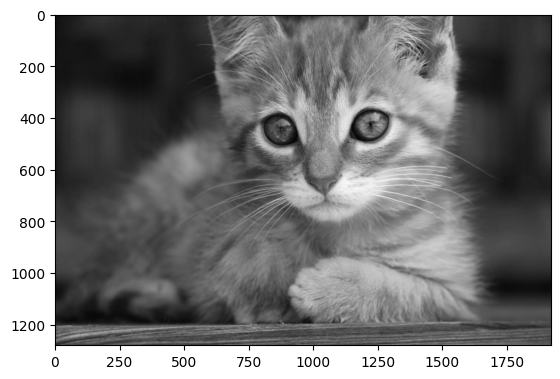

In [37]:
plt.imshow(cat_image, cmap='gray')

In [38]:
from numpy.linalg import svd

In [39]:
original_shape = cat_image.shape
print(original_shape) 

(1280, 1920)


In [40]:
def compress_svd(image,k):
    U,s,V = svd(image,full_matrices=False)
    reconst_matrix = np.dot(U[:,:k],np.dot(np.diag(s[:k]),V[:k,:]))
   
    return reconst_matrix,s

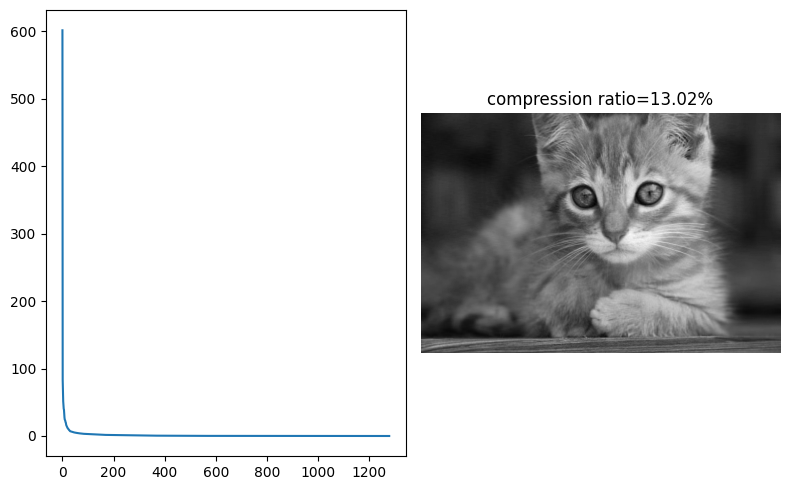

In [42]:
k=100
reconst_img,s = compress_svd(cat_image,k)
fig,axes = plt.subplots(1,2,figsize=(8,5))
axes[0].plot(s)
compression_ratio =100.0* (k*(original_shape[0] + original_shape[1])+k)/(original_shape[0]*original_shape[1])

axes[1].set_title("compression ratio={:.2f}".format(compression_ratio)+"%")
axes[1].imshow(reconst_img,cmap='gray')
axes[1].axis('off')
fig.tight_layout()